In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [56]:
# Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt

In [57]:
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv',sep=',')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


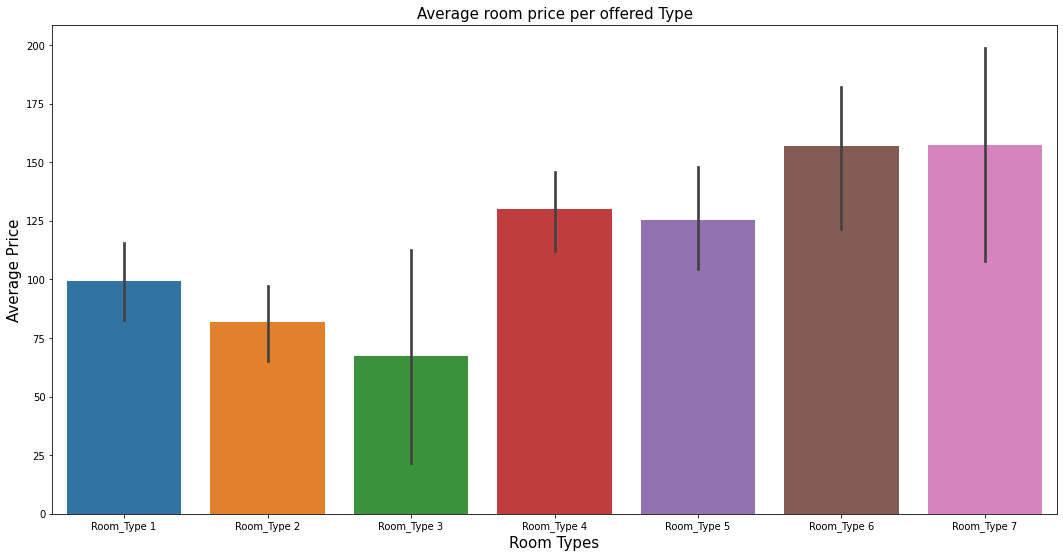

In [58]:
price_people_room = df.groupby(['room_type_reserved', 'no_of_adults', 'no_of_children']) \
                                    ['avg_price_per_room'] \
                                    .agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
ax.set_title('Average room price per offered Type', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

In [67]:
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

,room_type_reserved,no_of_adults,no_of_children,avg_price_per_room
0,Room_Type 1,0,2,57.190000
1,Room_Type 1,0,3,43.800000
2,Room_Type 1,1,0,88.202939
3,Room_Type 1,1,1,95.615405
4,Room_Type 1,1,2,128.800000
...,...,...,...,...
59,Room_Type 7,2,2,208.440976
60,Room_Type 7,2,3,207.805000
61,Room_Type 7,3,0,185.951905
62,Room_Type 7,3,1,219.963333


In [ ]:
price_people_room = df.groupby(['room_type_reserved', 'no_of_adults', 'no_of_children']) \
                                    ['avg_price_per_room'] \
                                    .agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
ax.set_title('Average room price per offered Type', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

array([[<AxesSubplot:ylabel='Frequency'>]], dtype=object)

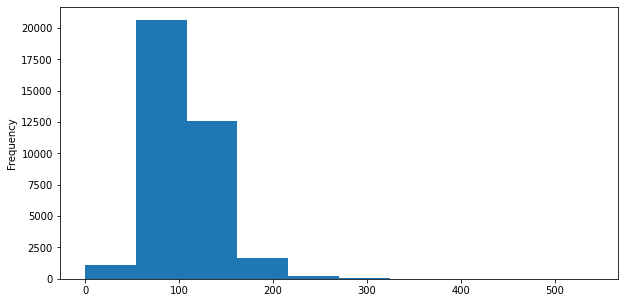

In [59]:
df['avg_price_per_room'].plot.hist(subplots=True, layout=(1,1), figsize=(10, 5), bins=10)

array([[<AxesSubplot:ylabel='Frequency'>]], dtype=object)

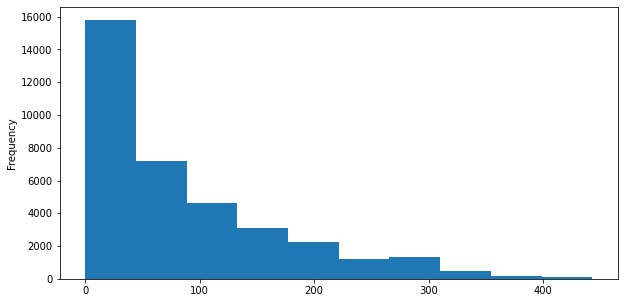

In [60]:
df['lead_time'].plot.hist(subplots=True, layout=(1,1), figsize=(10, 5), bins=10)

# Data pre-processing
Process data as classified data

In [61]:
# type_of_meal_plan
for i in range(0,len(df['type_of_meal_plan'])):
    if df.iloc[i,5 ]=='Meal Plan 1':
        df.iloc[i,5]=0
    elif df.iloc[i,5 ]=='Meal Plan 2':
        df.iloc[i,5]=1
    elif df.iloc[i,5 ]=='Not Selected':
        df.iloc[i,5]=2
    else:
        df.iloc[i,5]=3
# room_type_reserved
for i in range(0,len(df['room_type_reserved'])):
    if df.iloc[i,7 ]=='Room_Type 1':
        df.iloc[i,7]=0
    elif df.iloc[i,7 ]=='Room_Type 2' or df.iloc[i,7 ]=='Room_Type 3':
        df.iloc[i,7]=1
    else:
        df.iloc[i,7]=2
# lead_time
# for i in range(0,len(df['lead_time'])):
#     if df.iloc[i,8 ]<=50:
#         df.iloc[i,8]=0
#     elif df.iloc[i,8 ]>50 and df.iloc[i,8 ]<=100:
#         df.iloc[i,8]=1
#     elif df.iloc[i,8 ]>100 and df.iloc[i,8 ]<=150:
#         df.iloc[i,8]=2
#     else:
#         df.iloc[i,8]=3
# arrival_date
for i in range(0,len(df['arrival_date'])):
    if df.iloc[i,11 ]<=10:
        df.iloc[i,11]=0
    elif df.iloc[i,11 ]>10 and df.iloc[i,11]<=20:
        df.iloc[i,11]=1
    else:
        df.iloc[i,11]=2
# market_segment_type
for i in range(0,len(df['market_segment_type'])):
    if df.iloc[i,12 ]=='Online':
        df.iloc[i,12]=0
    elif df.iloc[i,12 ]=='Offline':
        df.iloc[i,12]=1
    else:
        df.iloc[i,12]=2
# avg_price_per_room
for i in range(0,len(df['avg_price_per_room'])):
    if df.iloc[i,16 ]<=50:
        df.iloc[i,16]=0
    elif df.iloc[i,16 ]>50 and df.iloc[i,16 ]<=100:
        df.iloc[i,16]=1
    elif df.iloc[i,16 ]>100 and df.iloc[i,16 ]<=150:
        df.iloc[i,16]=2
    else:
        df.iloc[i,16]=3
# booking_status
for i in range(0,len(df['booking_status'])):
    if df.iloc[i,18 ]=='Not_Canceled':
        df.iloc[i,18]=0
    else:
        df.iloc[i,18]=1

In [62]:
df.drop(['Booking_ID'],axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,0,1,0,0,0,1.0,0,0
1,2,0,2,3,2,0,0,5,2018,11,0,0,0,0,0,2.0,1,0
2,1,0,2,1,0,0,0,1,2018,2,2,0,0,0,0,1.0,0,1
3,2,0,0,2,0,0,0,211,2018,5,1,0,0,0,0,1.0,0,1
4,2,0,1,1,2,0,0,48,2018,4,1,0,0,0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,2,85,2018,8,0,0,0,0,0,3.0,1,0
36271,2,0,1,3,0,0,0,228,2018,10,1,0,0,0,0,1.0,2,1
36272,2,0,2,6,0,0,0,148,2018,7,0,0,0,0,0,1.0,2,0
36273,2,0,0,3,2,0,0,63,2018,4,2,0,0,0,0,1.0,0,1


In [129]:
#names=df.columns[1:18]
X=df[names].drop(['Booking_ID','booking_status'],axis=1).values
#X = df.drop(['Booking_ID'],axis=1).values
#X= df[['no_of_children','no_of_weekend_nights','no_of_week_nights','avg_price_per_room','no_of_special_requests','no_of_previous_bookings_not_canceled','lead_time','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space']].values
# X = df[['arrival_date','market_segment_type']].values
y = df['booking_status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
from sklearn.ensemble import RandomForestClassifier     

rfc = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')                     
rfc = rfc.fit(X_train.astype('int'),y_train.astype('int'))                 
# result = rfc.score(X_test,y_test.astype('int'))  
# print("train_score:", rfc.score(X_train, y_train.astype('int')))
# print("test_result：",result)

In [132]:
nb_predict_train = rfc.predict(X_train)
print("Accuracy over Training data: {0:.4f}".format(metrics.accuracy_score(y_train.astype('int'), nb_predict_train)))
nb_predict_test = rfc.predict(X_test)
print("Accuracy over Testing data: {0:.4f}".format(metrics.accuracy_score(y_test.astype('int'), nb_predict_test)))

Accuracy over Training data: 0.9636
Accuracy over Testing data: 0.8958


In [95]:
print(metrics.classification_report(y_test.astype('int'), nb_predict_test, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.83      0.75      0.79      2416
           0       0.88      0.92      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255



### Cross Validation Score and Training Score Plots

<AxesSubplot:title={'center':'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

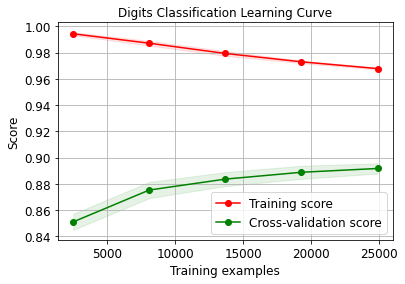

In [104]:
skplt.estimators.plot_learning_curve(rfc, X_train, y_train.astype('int'),
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")

In [147]:
from sklearn import tree
DecisionTreeObj = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random",max_depth=20)
DecisionTreeObj = DecisionTreeObj.fit(X_train, y_train.astype('int'))

In [148]:
nb_predict_train = DecisionTreeObj.predict(X_train)
print("Accuracy over Training data: {0:.4f}".format(metrics.accuracy_score(y_train.astype('int'), nb_predict_train)))
nb_predict_test = rfc.predict(X_test)
print("Accuracy over Testing data: {0:.4f}".format(metrics.accuracy_score(y_test.astype('int'), nb_predict_test)))

Accuracy over Training data: 0.9565
Accuracy over Testing data: 0.8955


In [145]:
print(metrics.classification_report(y_test.astype('int'), nb_predict_test, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.88      0.80      0.84      2416
           0       0.90      0.94      0.92      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.90      0.89      7255



<AxesSubplot:title={'center':'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

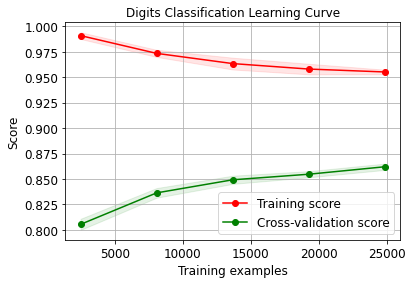

In [149]:
skplt.estimators.plot_learning_curve(DecisionTreeObj, X_train, y_train.astype('int'),
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")